In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('HR.csv')

# Statistics

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Visualize

In [45]:
quantity_data = data.drop(columns=['department', 'salary'])

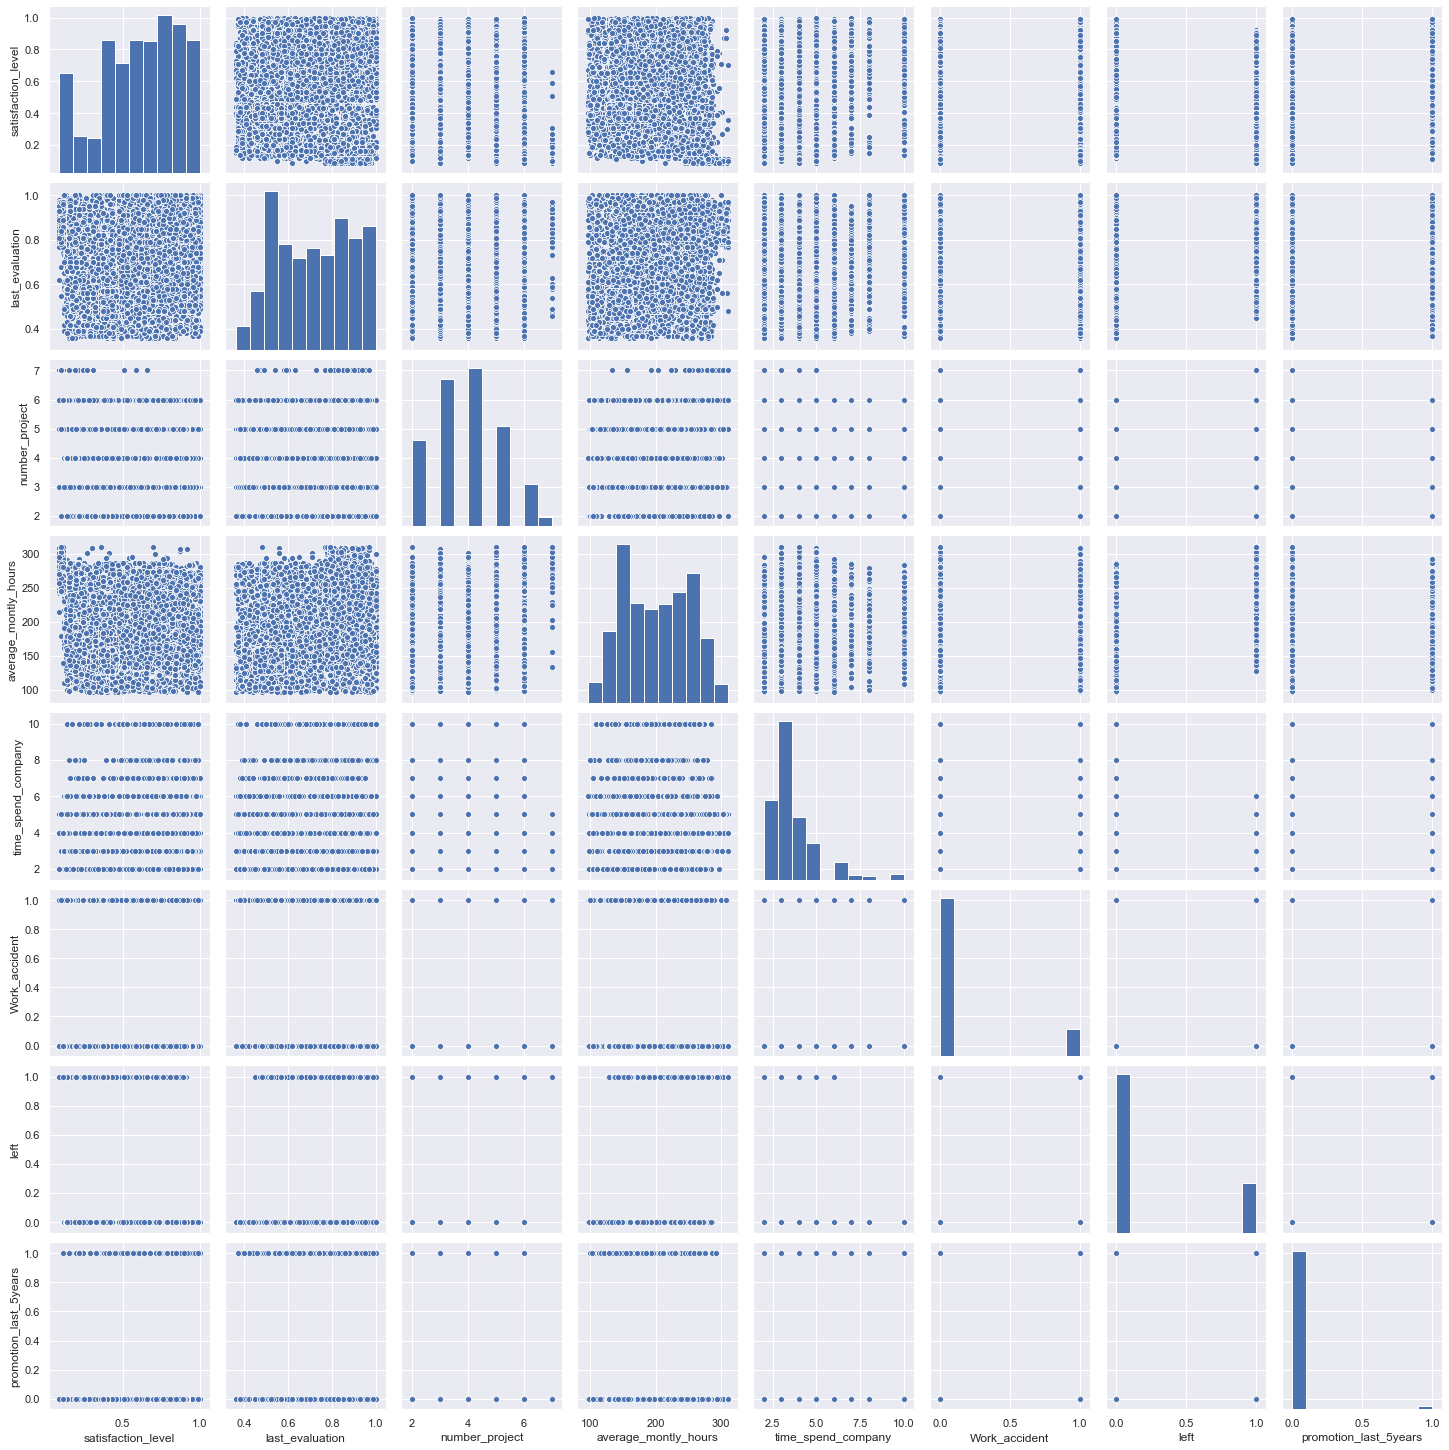

In [46]:
sns.pairplot(quantity_data)

In [ ]:
quantity_data.corr(method='kendall').sort

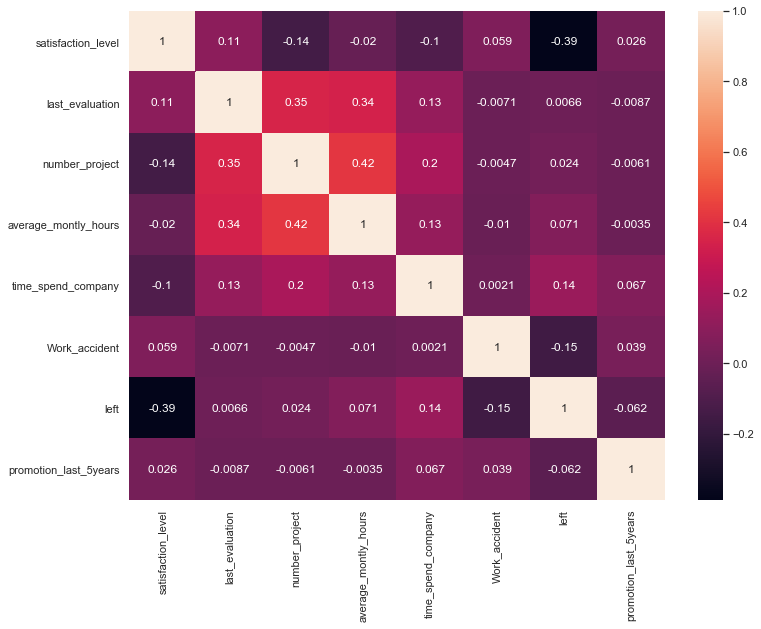

In [44]:
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(quantity_data.corr(method='kendall'), annot = True)

# Самые скорреляированные

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


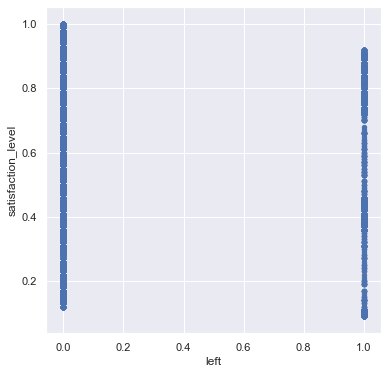

In [48]:
sns.set(rc={'figure.figsize':(6,6)})
data.plot(kind = 'scatter', x='left', y='satisfaction_level')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


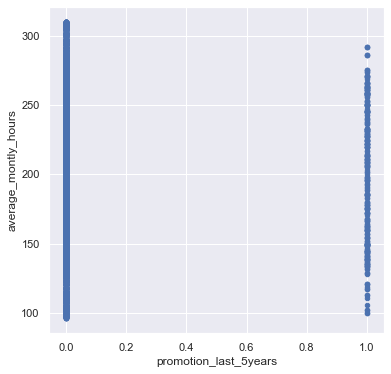

In [54]:
sns.set(rc={'figure.figsize':(6,6)})
data.plot(kind = 'scatter', x='promotion_last_5years', y='average_montly_hours')

# Employees per department

In [93]:
import matplotlib.pyplot as plt

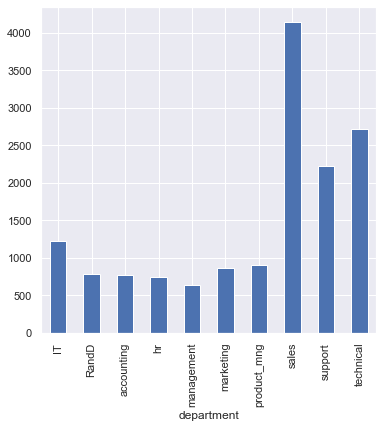

In [66]:
count = data.groupby('department').count()['left']
count.plot(kind = 'bar')

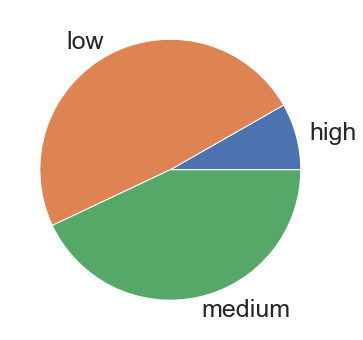

In [78]:
count = data.groupby('salary').count()['left']
count.rename()
count.plot(kind = 'pie', fontsize = 25, ylabel='')

In [179]:
salary_by_dep = pd.DataFrame(data.groupby(['department', 'salary']).count()['left'])
salary_by_dep.head()

left
department salary      
IT         high      83
           low      609
           medium   535
RandD      high      51
           low      364

In [180]:
salary_by_dep

left
department  salary      
IT          high      83
            low      609
            medium   535
RandD       high      51
            low      364
            medium   372
accounting  high      74
            low      358
            medium   335
hr          high      45
            low      335
            medium   359
management  high     225
            low      180
            medium   225
marketing   high      80
            low      402
            medium   376
product_mng high      68
            low      451
            medium   383
sales       high     269
            low     2099
            medium  1772
support     high     141
            low     1146
            medium   942
technical   high     201
            low     1372
            medium  1147

In [227]:
res = pd.DataFrame({})
for dep in sorted(set(data.department)):
    join = salary_by_dep.loc[dep]
    index = [dep]
    df = pd.DataFrame({'high': [join['left'].values[0]],
                  'low': [join['left'].values[1]],
                  'medium': [join['left'].values[2]]},
                  index=index)
    res = pd.concat([res, df])
res

,high,low,medium
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942
technical,201,1372,1147


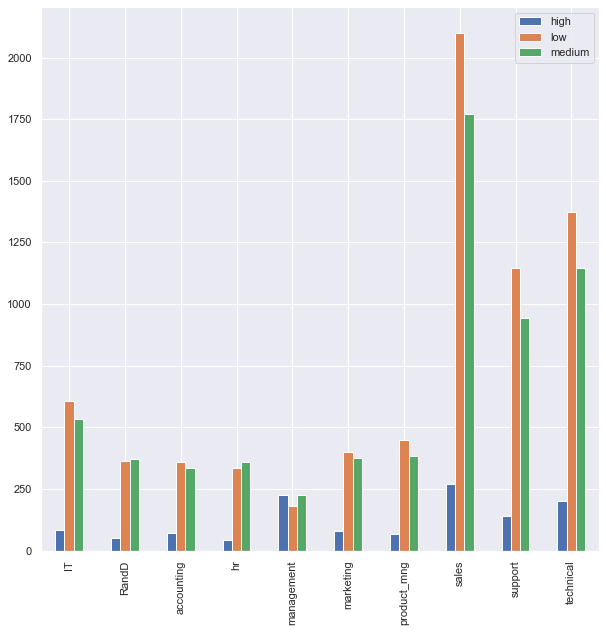

In [228]:
res.plot(kind='bar', figsize=(10,10))

# Hypothesis check

In [27]:
low_salaries_hours = data[data.salary=='low']['average_montly_hours']
high_salaries_hours = data[data.salary=='high']['average_montly_hours']

H0: сотрудники с высокими зарплатами работают столько же или меньше
H1: сотрудники с высоким высокими зарплатами работают больше

In [37]:
high_salaries_hours.mean()
low_salaries_hours.mean()

200.9965828321487

In [40]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_ind(high_salaries_hours, low_salaries_hours, equal_var=False)
if (result.statistic < 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую нулевую гипотезу, сотрудники с высокими зарплатами работают столько же')

Не отвергаем нулевую нулевую гипотезу, сотрудники с высокими зарплатами работают столько же


In [ ]:
H0: средняя удовлетворенность клиентов Samsung и Apple одинаковая  
H1: средняя удовлетворенность клиентов Samsung и Apple различается

# Left

In [41]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [51]:
pd.DataFrame(data.groupby('left')['promotion_last_5years'].sum())

,promotion_last_5years
left,
0,300
1,19


In [52]:
pd.DataFrame(data.groupby('left')['satisfaction_level'].mean())

,satisfaction_level
left,
0,0.666810
1,0.440098


In [53]:
pd.DataFrame(data.groupby('left')['number_project'].mean())

,number_project
left,
0,3.786664
1,3.855503


In [56]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [64]:
y = data['left']
X = data.drop(columns=['left', 'department','salary'])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [66]:
X_train.shape

(10499, 7)

In [67]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
accuracy_score(lda.predict(_test), y_test)